In [1]:
import sympy as sp
from sympt import *
import numpy as np
import matplotlib.pyplot as plt


from multiprocessing import cpu_count
from concurrent.futures import ProcessPoolExecutor

import sys
import os
sys.path.append("/home/leander/GoogleDriveSync/PhD/Python/")

from Elliptical_Well import EllipticalConfinement
from Cylindrical_Magnet import CylindricalMagnet, BLinear
from Packages.utils import apply_subs


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=18)     # fontsize |of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize


# Transparent background for figures but keep the legend background white but its text color black
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'none'
plt.rcParams['legend.framealpha'] = 0.8
plt.rcParams['legend.shadow'] = False
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'none'
# White spins, axis and ticks 
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'

In [2]:
H_conf = EllipticalConfinement()
H_conf.H

hbar*omega_x*(k_+*(1/2 + Dagger(a_+)*a_+) + k_-*(1/2 + Dagger(a_-)*a_-))

In [10]:
display_dict(H_conf.omega_pm_to_xyc_subs)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

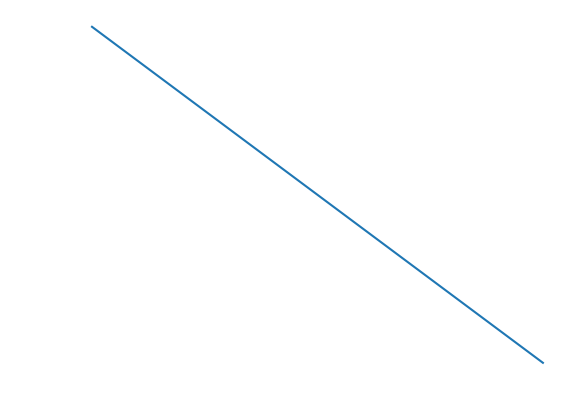

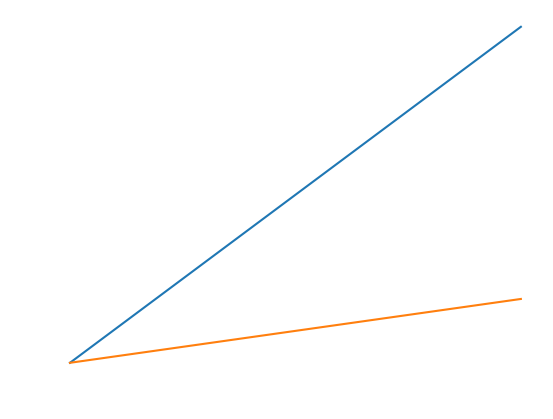

In [35]:
hbar_value = 1.054571817e-34  # Planck constant over 2π, in J·s
e_constant = 1.602176634e-19  # Elementary charge magnitude, in C
e_charge = -e_constant        # Electron charge, in C
m_electron = 9.10938356e-31   # Mass of a free electron, in kg
m_si = 0.19 * m_electron  # Effective mass of electron in silicon conduction band


lx = 60e-9
wx = hbar_value / (m_si * lx**2)

wx / (2 * np.pi) * 1e-9  # Convert to GHz

kc = np.linspace(0, 1)

B = kc * wx * m_si / e_charge
plt.plot(kc, B * 1e3, label='Cylindrical Magnet')
plt.show()
kB = -e_constant * B / m_electron * 1/wx
plt.plot(kc, kc)
plt.plot(kc, kB, label='Cylindrical Magnet (kB)')

In [41]:
varphi = sp.symbols('varphi')
(((1 + sp.sqrt(5))/2)**-2).simplify()

3/2 - sqrt(5)/2

In [16]:
display_dict(H_conf.trig_subs)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [25]:
(H_conf.xp**2).subs(H_conf.inv_pos_mom_symbols).subs(H_conf.inv_effective_lengths_subs).subs(H_conf.trig_subs).subs(H_conf.omega_pm_to_xyc_subs).subs(H_conf.eccentricity, 0).simplify()

sqrt(2*k_c**2 + 2*sqrt(k_c**2 + 4)*Abs(k_c) + 4)/(2*(k_c**2 + sqrt(k_c**2 + 4)*Abs(k_c) + 4))

In [24]:
(H_conf.xm**2).subs(H_conf.inv_pos_mom_symbols).subs(H_conf.inv_effective_lengths_subs).subs(H_conf.trig_subs).subs(H_conf.omega_pm_to_xyc_subs).subs(H_conf.eccentricity, 0).simplify()

sqrt(2*k_c**2 - 2*sqrt(k_c**2 + 4)*Abs(k_c) + 4)/(2*(k_c**2 - sqrt(k_c**2 + 4)*Abs(k_c) + 4))

In [8]:
display_dict(H_conf.boson_transformation)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [32]:
bosons = list(H_conf.boson_transformation.values())
Ap = sp.Rational(1, 2) * (sp.sqrt(H_conf.kp**2 + 1)/sp.sqrt(H_conf.kp)/H_conf.lx * H_conf.qp + 2*H_conf.lx*sp.I*sp.sqrt(H_conf.kp)/(hbar * sp.sqrt(H_conf.kp**2 + 1)) * H_conf.pp).expand()
Ap_dag = sp.Rational(1, 2) * (sp.sqrt(H_conf.kp**2 + 1)/sp.sqrt(H_conf.kp)/H_conf.lx * H_conf.qp - 2*H_conf.lx*sp.I*sp.sqrt(H_conf.kp)/(hbar * sp.sqrt(H_conf.kp**2 + 1)) * H_conf.pp).expand()
Am = sp.Rational(1, 2) * (sp.sqrt(H_conf.kp**2 + 1)*sp.sqrt(H_conf.km)/H_conf.lx * H_conf.qm + 2*H_conf.lx*sp.I/sp.sqrt(H_conf.km)/(hbar * sp.sqrt(H_conf.kp**2 + 1)) * H_conf.pm).expand()
Am_dag = sp.Rational(1, 2) * (sp.sqrt(H_conf.kp**2 + 1)*sp.sqrt(H_conf.km)/H_conf.lx * H_conf.qm - 2*H_conf.lx*sp.I/sp.sqrt(H_conf.km)/(hbar * sp.sqrt(H_conf.kp**2 + 1)) * H_conf.pm).expand()

In [3]:
display_dict(H_conf.position_momentum_to_new_basis)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
display_dict(H_conf.pos_mom_to_new_basis_effective_lengths)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
display_dict(H_conf.pos_mom_to_new_basis_symbols)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
R, L = sp.symbols('R L', real = True, positive = True)

Dx, Dy, Dz = sp.symbols('Delta_x Delta_y Delta_z', real = True)
x, y = sp.symbols('x y', real = True)

Skyrmion = CylindricalMagnet(R, L, sp.Matrix([Dx, Dy, Dz]))
Skyrmion.B0 = 1

In [7]:
integral_order = 7
taylor_expansion_order = 3
Bx, By, Bz = Skyrmion.B_integral_expansion(sp.Matrix([x, y, 0]), order=integral_order)

In [8]:
Bx_linear, By_linear, Bz_linear = Skyrmion.B_integral_expansion_linear([x, y], [0, 0], taylor_order=taylor_expansion_order, parallel=True)

In [9]:
Spin = RDBasis('sigma', dim=2)
s0, sx, sy, sz = Spin.basis
spin_vector = sp.Matrix([sx, sy, sz])

kB = RDSymbol('k_B', real=True, positive=True)                 # External magnetic field
kB0 = RDSymbol('k_{B_0}', real=True, positive=True)            # Magnetic field of the Skyrmion
kM_z = RDSymbol('k_{M_z}', real=True, positive=True, order=1)  # Magnetization of the material

omegax_total = sp.Add(*[kB0 * H_conf.lx**(-order) * Bx_linear.get(order)  for order in range(taylor_expansion_order + 1)]).subs(dict(zip([x, y], [H_conf.x, H_conf.y])))
omegay_total = sp.Add(*[kB0 * H_conf.lx**(-order) *  By_linear.get(order)  for order in range(taylor_expansion_order + 1)]).subs(dict(zip([x, y], [H_conf.x, H_conf.y])))
omegaz_total = sp.Add(-kM_z, *[kB0 * H_conf.lx**(-order) * Bz_linear.get(order) for order in range(taylor_expansion_order + 1)]).subs(dict(zip([x, y], [H_conf.x, H_conf.y])))

omega_total = H_conf.omega_x * sp.Matrix([omegax_total, omegay_total, omegaz_total])

H_Zeeman = ((- sp.Rational(1, 2) * hbar * spin_vector.dot(omega_total))  / (hbar * H_conf.omega_x)).collect(hbar * H_conf.omega_x)
H_Zeeman

-(omega_x*sigma_1*(k_{B_0}*{B_x}^{(1)} + k_{B_0}*({B_x}^{(x)}*x + {B_x}^{(y)}*y)/l_x + k_{B_0}*({B_x}^{(x**2)}*x**2 + {B_x}^{(x*y)}*y*x + {B_x}^{(y**2)}*y**2)/l_x**2 + k_{B_0}*({B_x}^{(x**2*y)}*y*x**2 + {B_x}^{(x**3)}*x**3 + {B_x}^{(x*y**2)}*y**2*x + {B_x}^{(y**3)}*y**3)/l_x**3) + omega_x*sigma_2*(k_{B_0}*{B_y}^{(1)} + k_{B_0}*({B_y}^{(x)}*x + {B_y}^{(y)}*y)/l_x + k_{B_0}*({B_y}^{(x**2)}*x**2 + {B_y}^{(x*y)}*y*x + {B_y}^{(y**2)}*y**2)/l_x**2 + k_{B_0}*({B_y}^{(x**2*y)}*y*x**2 + {B_y}^{(x**3)}*x**3 + {B_y}^{(x*y**2)}*y**2*x + {B_y}^{(y**3)}*y**3)/l_x**3) + omega_x*sigma_3*(k_{B_0}*{B_z}^{(1)} + k_{B_0}*({B_z}^{(x)}*x + {B_z}^{(y)}*y)/l_x + k_{B_0}*({B_z}^{(x**2)}*x**2 + {B_z}^{(x*y)}*y*x + {B_z}^{(y**2)}*y**2)/l_x**2 + k_{B_0}*({B_z}^{(x**2*y)}*y*x**2 + {B_z}^{(x**3)}*x**3 + {B_z}^{(x*y**2)}*y**2*x + {B_z}^{(y**3)}*y**3)/l_x**3 - k_{M_z}))/(2*omega_x)

In [10]:
kE = sp.symbols('k_E', real=True)
H_Drive = (-1 / (kE**3 * H_conf.lx) * (H_conf.x).subs(H_conf.pos_mom_to_new_basis_symbols)).cancel()
H_Drive

-(x_+*(Dagger(a_+) + a_+) - I*x_-*(-Dagger(a_-) + a_-))/k_E**3

In [11]:
normal_ordering = {
    H_conf.a_m * H_conf.a_p : H_conf.a_p * H_conf.a_m,
    H_conf.ad_m * H_conf.ad_p : H_conf.ad_p * H_conf.a_m,
    H_conf.a_m * H_conf.ad_p : H_conf.ad_p * H_conf.a_m,
    H_conf.ad_m * H_conf.a_p : H_conf.a_p * H_conf.ad_m,
    H_conf.a_m * H_conf.ad_m : H_conf.ad_m * H_conf.a_m + 1,
    H_conf.a_p * H_conf.ad_p : H_conf.ad_p * H_conf.a_p + 1,
}

H0 = ((H_conf.H - sp.Rational(1, 2) * hbar * H_conf.omega_x * kB * sz)/(hbar * H_conf.omega_x) ).collect(hbar).collect(H_conf.omega_x)
display(H0)


H_Zeeman_by_terms = H_Zeeman.expand().as_ordered_terms()
H_Zeeman_by_terms

H_eff_2 = {}
H_eff_1 = {}

def compute_effective_frame(args):
    i, H1 = args
    H1 = apply_subs(H1.subs(H_conf.pos_mom_to_new_basis_symbols).expand(), normal_ordering)
    Eff_frame = EffectiveFrame(H0 + H1, subspaces=[Spin], verbose=False)
    Eff_frame.solve(method='FD')
    Eff_frame.get_H()
    H_eff_2 = Eff_frame.H_corrections.get(2, 0)
    H_eff_1 = Eff_frame.H_corrections.get(1, 0)
    H_eff_Drive = Eff_frame.rotate(H_Drive, max_order=1)

    return i, H_eff_1, H_eff_2, H_eff_Drive

inputs = list(enumerate(H_Zeeman_by_terms))

# Use a multiprocessing Pool
with ProcessPoolExecutor(cpu_count()) as executor:
    results = list(tqdm(executor.map(compute_effective_frame, inputs), total=len(inputs)))

# Collect results
H_eff_1 = {}
H_eff_2 = {}
H_eff_Drive = {}

for i, h1, h2, hd in tqdm(results):
    H_eff_1[i] = h1
    H_eff_2[i] = h2
    H_eff_Drive[i] = hd

-k_B*sigma_3/2 + k_+*(1/2 + Dagger(a_+)*a_+) + k_-*(1/2 + Dagger(a_-)*a_-)

  0%|          | 0/31 [00:00<?, ?it/s]

100%|██████████| 31/31 [00:00<00:00, 503966.76it/s]


In [12]:
project_into_qubit = {
    H_conf.a_m : 0,
    H_conf.ad_m : 0,
    H_conf.a_p : 0,
    H_conf.ad_p : 0,
}

H_qubit_1 = {}
H_qubit_2 = {}
H_qubit_drive = {}

for i, h1 in tqdm(H_eff_1.items()):
    H_qubit_1[i] = h1.subs(project_into_qubit) if h1 != 0 else 0

for i, h2 in tqdm(H_eff_2.items()):
    H_qubit_2[i] = h2.subs(project_into_qubit) if h2 != 0 else 0

for i, hd in tqdm(H_eff_Drive.items()):
    H_qubit_drive[i] = hd.subs(project_into_qubit) if hd != 0 else 0

100%|██████████| 31/31 [00:01<00:00, 16.01it/s]


In [13]:
for i, h1 in tqdm(H_qubit_1.items()):
    if h1 == 0:
        continue
    H_qubit_1[i] = h1.subs(H_conf.inv_pos_mom_symbols).subs((H_conf.trig_subs))

for i, h2 in tqdm(H_qubit_2.items()):
    if h2 == 0:
        continue
    H_qubit_2[i] = h2.subs(H_conf.inv_pos_mom_symbols).subs(H_conf.trig_subs)

for i, hd in tqdm(H_qubit_drive.items()):
    if hd == 0:
        continue
    H_qubit_drive[i] = hd.subs(H_conf.inv_pos_mom_symbols).subs(H_conf.trig_subs)

100%|██████████| 31/31 [00:00<00:00, 63.20it/s]


In [14]:
H_qubit_2[0]

-k_{B_0}**2*{B_x}^{(1)}**2*sigma_3/(4*k_B)

# Numerical Results

In [15]:
from Elliptical_Well import hbar_value, e_constant, m_electron


# Confinement values

lx = 60 #nm
eccentricity = 0 # 0 - For a circular confinement, 1 - for a nanowire
B = 90e-3 # mT  Perpendicular magnetic field (+z)
kB = RDSymbol('k_B', real=True, positive=True)   

H_conf.add_values(lx, eccentricity, B)
kB_value = (e_constant * B / m_electron) / (H_conf.omega_x.subs(H_conf.subs_numerical_values))

# Skyrmion Values
Dz_val = 130 / lx
L_val = 60 / lx
M_val = -225e3# A/m

dict_values = {
    Dz : Dz_val,
    Dx : 0,
    Dy : 0,
    L : L_val
}

mu_0 = 4 * np.pi * 1e-7

In [16]:
H_qubit_1_numerical = sp.Add(*[v.subs(H_conf.inv_pos_mom_symbols).subs(H_conf.inv_effective_lengths_subs).subs(H_conf.subs_numerical_values).subs(Bx_linear.B_linear_values).subs(By_linear.B_linear_values).subs(Bz_linear.B_linear_values).subs(dict_values) if v != 0 else 0 for k,v in H_qubit_1.items()])

In [17]:
H_qubit_2_numerical = sp.Add(*[v.subs(H_conf.inv_pos_mom_symbols).subs(H_conf.inv_effective_lengths_subs).subs(H_conf.subs_numerical_values).subs(Bx_linear.B_linear_values).subs(By_linear.B_linear_values).subs(Bz_linear.B_linear_values).subs(dict_values) if v != 0 else 0 for k,v in H_qubit_2.items()])

In [48]:
H_qubit_drive_numerical = sp.Add(*[v.subs(H_conf.inv_pos_mom_symbols).subs(H_conf.inv_effective_lengths_subs).subs(H_conf.subs_numerical_values).subs(Bx_linear.B_linear_values).subs(By_linear.B_linear_values).subs(Bz_linear.B_linear_values).subs(dict_values) if v != 0 else 0 for k,v in H_qubit_drive.items()])

In [18]:
print('Lambdifying H1')
H_qubit_1_matrix = (group_by_operators(H_qubit_1_numerical)[sz] * sz).subs(sz, sz.matrix)
H_qubit_1_numerical_f = sp.lambdify((kB0, kM_z, R), H_qubit_1_matrix[0, 0] - H_qubit_1_matrix[1, 1], 'numpy')
print('Lambdifying H2')
H_qubit_2_matrix = (group_by_operators(H_qubit_2_numerical)[sz] * sz).subs(sz, sz.matrix)
H_qubit_2_numerical_f = sp.lambdify((kB, kB0, kM_z, R), H_qubit_2_matrix[0, 0] - H_qubit_2_matrix[1, 1], 'numpy')

Lambdifying H1
Lambdifying H2


In [49]:
group_by_operators(H_qubit_drive_numerical)

{sigma_2: 0.00618626275696301*I*pi*k_B**3*k_{B_0}*R**4/(0.0933120000000001*k_B**4*R**6*k_E**3*sqrt(0.36*R**2 + 1) + 0.777600000000001*k_B**4*R**4*k_E**3*sqrt(0.36*R**2 + 1) + 2.16*k_B**4*R**2*k_E**3*sqrt(0.36*R**2 + 1) + 2*k_B**4*k_E**3*sqrt(0.36*R**2 + 1) - 0.209233761658061*k_B**2*R**6*k_E**3*sqrt(0.36*R**2 + 1) - 1.74361468048384*k_B**2*R**4*k_E**3*sqrt(0.36*R**2 + 1) - 4.84337411245512*k_B**2*R**2*k_E**3*sqrt(0.36*R**2 + 1) - 4.48460565968066*k_B**2*k_E**3*sqrt(0.36*R**2 + 1) + 0.0933120000000001*R**6*k_E**3*sqrt(0.36*R**2 + 1) + 0.7776*R**4*k_E**3*sqrt(0.36*R**2 + 1) + 2.16*R**2*k_E**3*sqrt(0.36*R**2 + 1) + 2.0*k_E**3*sqrt(0.36*R**2 + 1)) - 0.000230456246322505*I*pi*k_B**3*k_{B_0}*R**4/(0.00556182861328125*k_B**4*R**6*k_E**3*sqrt(0.140625*R**2 + 1) + 0.11865234375*k_B**4*R**4*k_E**3*sqrt(0.140625*R**2 + 1) + 0.84375*k_B**4*R**2*k_E**3*sqrt(0.140625*R**2 + 1) + 2*k_B**4*k_E**3*sqrt(0.140625*R**2 + 1) - 0.0124713040386475*k_B**2*R**6*k_E**3*sqrt(0.140625*R**2 + 1) - 0.26605448615781

In [224]:
Ex = group_by_operators(H_qubit_drive_numerical)[sx]
Ey = group_by_operators(H_qubit_drive_numerical)[sy]
Omega_R = Ex.conjugate() * Ex + Ey.conjugate() * Ey
Rabi_freq_numerical_f = sp.lambdify((kB, kB0, kM_z, kE, R), Omega_R, 'numpy')

In [216]:
float(((sp.sqrt(Ex.conjugate()*Ex + Ey.conjugate()*Ey)).subs(dict(zip([kB, kB0, kM_z, R], [kB_values[0], k_B0[0], 0, 0.8]))) * H_conf.omega_x.subs(H_conf.subs_numerical_values)).subs(kE, 1)) / (2 * np.pi * 1e6)

103.78584980365001

In [91]:
omega = sp.symbols('omega', real=True, positive=True)
Ex = RDSymbol('E_x', real=True, positive=True)
Ey = RDSymbol('E_y', real=True, positive=True)
Delta_Ez = sp.symbols('Delta_Ez', real=True, positive=True)

U = sp.exp(-sp.I * sz.matrix * omega / 2)
t = sp.symbols('t', real=True, positive=True)
alpha_1 = sp.exp(-sp.I * ((Ex * sy.matrix - Ey * sx.matrix) / 2 + Delta_Ez * sz.matrix/2) * t)[1, 0]
sp.expand_complex(alpha_1.conjugate() * alpha_1).cancel().simplify()

(E_x**2 + E_y**2)*sin(t*sqrt(E_x**2 + E_y**2 + Delta_Ez**2)/2)**2/(E_x**2 + E_y**2 + Delta_Ez**2)

In [90]:
((Ex * sy.matrix - Ey * sx.matrix) / 2).expand()

Matrix([
[              0, -I*E_x/2 - E_y/2],
[I*E_x/2 - E_y/2,                0]])

In [82]:
(U * (Ex * sx.matrix + Ey * sy.matrix) / 2 * (sp.exp(sp.I * omega)  - sp.exp(-sp.I * omega)) / (sp.I) * U.inv()).expand()

Matrix([
[                                                               0, -I*E_x/2 + I*E_x*exp(-2*I*omega)/2 - E_y/2 + E_y*exp(-2*I*omega)/2],
[-I*E_x*exp(2*I*omega)/2 + I*E_x/2 + E_y*exp(2*I*omega)/2 - E_y/2,                                                                  0]])

In [41]:
import matplotlib.pyplot as plt

plt.rcdefaults()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 20,
    "axes.titlesize": 18,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 18,
    "figure.titlesize": 12,
    "lines.linewidth": 1.5,
    "axes.grid": False,
    "grid.alpha": 0.5,
    "figure.figsize": (8, 6),
    "figure.dpi": 100,
    "savefig.dpi": 300,
    "savefig.bbox": 'tight',
    "savefig.format": 'pdf',
    "savefig.transparent": True,
})

In [147]:
qubit_freqs_per_M = []
M_vals = np.linspace(-1e6, -100e3, 5) # A/m

for M_val in M_vals:
    R_min, R_max = 10 / lx, 50 / lx
    Rs = np.linspace(R_min, R_max, 100)

    qubit_frequencies = []

    B0 = mu_0 * M_val / (4 * np.pi)
    k_B0 = (e_constant * B0 *  g_factors / (2 * m_electron)) / (H_conf.omega_x.subs(H_conf.subs_numerical_values))

    for r in tqdm(Rs):
        H1_r = H_qubit_1_numerical_f(k_B0.max(), 0, r)
        H2_r = H_qubit_2_numerical_f(kB_values.max(), k_B0.max(), 0, r)
        qubit_freq_r = (H1_r + H2_r) * H_conf.omega_x.subs(H_conf.subs_numerical_values)
        q_val_r = [qubit_freq_r]
        H1_r = H_qubit_1_numerical_f(k_B0.min(), 0, r)
        H2_r = H_qubit_2_numerical_f(kB_values.min(), k_B0.min(), 0, r)
        qubit_freq_r = (H1_r + H2_r) * H_conf.omega_x.subs(H_conf.subs_numerical_values)
        q_val_r.append(qubit_freq_r)
        qubit_frequencies.append(q_val_r[::-1])

    qubit_freqs_per_M.append(qubit_frequencies)

100%|██████████| 100/100 [00:28<00:00,  3.54it/s]


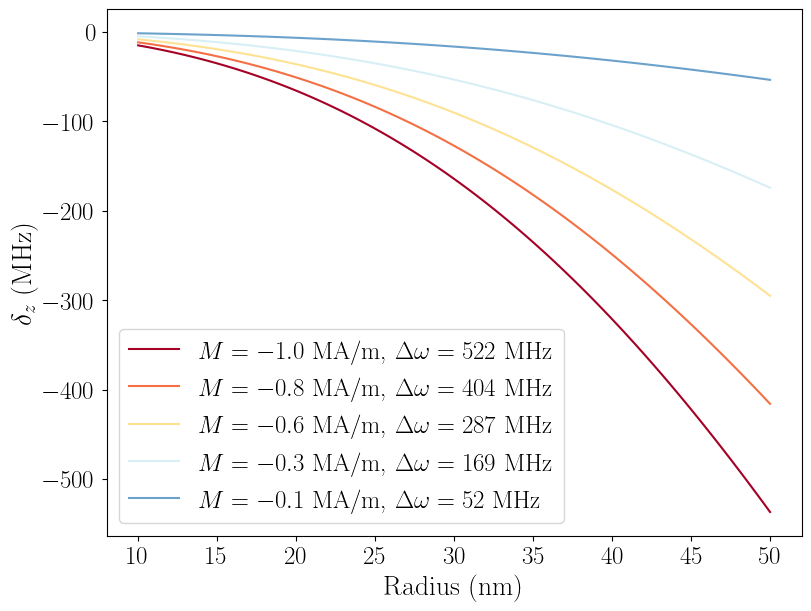

In [170]:
# Cmap to Inferno
cmap = plt.get_cmap('RdYlBu')


fig, ax = plt.subplots(figsize = (8, 6), constrained_layout=True)

for M_val, qubit_freqs in zip(M_vals, qubit_freqs_per_M):
    Rs = np.linspace(R_min, R_max, 100)
    qubit_freqs = np.array(qubit_freqs)
    ax.plot(Rs * lx, -qubit_freqs[:, 0] / (2 * np.pi * 1e6), label=f'$M = {M_val/1e6:.1f}$ MA/m, $\Delta \omega={np.abs(qubit_freqs[:, 0].max() - qubit_freqs[:, 0].min()) / (2 * np.pi * 1e6):.0f}$ MHz', color=cmap((M_val + 1e6) / (1e6 + 1e5)))

ax.set_xlabel('Radius (nm)')
ax.set_ylabel('$\delta_z$ (MHz)')

ax.legend()

In [149]:
g_factors = np.random.uniform(1.993, 2, size=20)

omegas_z = e_constant * g_factors / (2 * m_electron) * B

kB_values = omegas_z / (H_conf.omega_x.subs(H_conf.subs_numerical_values))

Delta_z_stark = 10e6 # 10 MHz at 1.5 T
Delta_g_stark = Delta_z_stark * 2 * np.pi * 2 * m_electron / (e_constant * 1.5)  # MHz
Delta_omega_z = e_constant * Delta_g_stark / (2 * m_electron) * B

k_Delta_z_stark = Delta_omega_z / (H_conf.omega_x.subs(H_conf.subs_numerical_values))

In [150]:
# import from scipy.optimize the zero finder
from scipy.optimize import root

In [265]:
M_val = -1e6 # A/m
Rs = np.linspace(R_min, R_max, 100)
qubit_freqs = []

B0 = mu_0 * M_val / (4 * np.pi)  # Magnetic field of the Skyrmion
k_B0 = (e_constant * B0 *  g_factors / (2 * m_electron)) / (H_conf.omega_x.subs(H_conf.subs_numerical_values))


def compute_delta_omega_z(r, i):
    H1_r = H_qubit_1_numerical_f(k_B0[i], 0, r)
    H2_r = H_qubit_2_numerical_f(kB_values[i], k_B0[i], 0, r)
    qubit_freq_r = (H1_r + H2_r) * H_conf.omega_x.subs(H_conf.subs_numerical_values)
    
    return float(qubit_freq_r / (2 * np.pi * 1e6))

R_required = []
band_freqs =  (np.max(qubit_freqs_per_M[0]) - np.min(qubit_freqs_per_M[0])) / (2 * np.pi * 1e6)

target_qubit_freq = np.max(omegas_z) / (2 * np.pi * 1e6) - band_freqs  # Target frequency is the maximum frequency minus the bandwidth

delta_freq = band_freqs / len(omegas_z)  # Frequency step size

delta_freqs = []

print(f'\nTarget qubit frequency: {target_qubit_freq:.2f} MHz, Bandwidth: {band_freqs:.2f} MHz\n')

for i, qubit_freq in enumerate(omegas_z):
    qubit_freq = qubit_freq / (2 * np.pi * 1e6)  # Convert to MHz
    delta_freq_required = np.abs(target_qubit_freq - qubit_freq)

    f_to_find = lambda r: compute_delta_omega_z(r, i) - delta_freq_required
    r_required = root(f_to_find, [R_min]).x[0]

    R_required.append(r_required)
    delta_freqs.append(compute_delta_omega_z(r_required, i))

    print(f'Target frequency: {target_qubit_freq:.2f} MHz, Qubit frequency: {qubit_freq:.2f} MHz, Delta frequency required: {delta_freq_required:.2f} MHz -> Required radius: {r_required * lx:.4f} nm, computed frequency: {delta_freqs[-1]:.2f} MHz')

    # target_qubit_freq = target_qubit_freq + delta_freq


Target qubit frequency: 1997.50 MHz, Bandwidth: 521.74 MHz



/tmp/ipykernel_161106/2611481695.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(qubit_freq_r / (2 * np.pi * 1e6))


Target frequency: 1997.50 MHz, Qubit frequency: 2515.74 MHz, Delta frequency required: 518.24 MHz -> Required radius: 49.2598 nm, computed frequency: 518.24 MHz
Target frequency: 1997.50 MHz, Qubit frequency: 2510.68 MHz, Delta frequency required: 513.18 MHz -> Required radius: 49.0908 nm, computed frequency: 513.18 MHz
Target frequency: 1997.50 MHz, Qubit frequency: 2517.20 MHz, Delta frequency required: 519.70 MHz -> Required radius: 49.3084 nm, computed frequency: 519.70 MHz
Target frequency: 1997.50 MHz, Qubit frequency: 2511.70 MHz, Delta frequency required: 514.20 MHz -> Required radius: 49.1249 nm, computed frequency: 514.20 MHz
Target frequency: 1997.50 MHz, Qubit frequency: 2518.69 MHz, Delta frequency required: 521.19 MHz -> Required radius: 49.3578 nm, computed frequency: 521.19 MHz
Target frequency: 1997.50 MHz, Qubit frequency: 2512.82 MHz, Delta frequency required: 515.32 MHz -> Required radius: 49.1624 nm, computed frequency: 515.32 MHz
Target frequency: 1997.50 MHz, Qub

In [275]:
band_freqs

521.744203456957

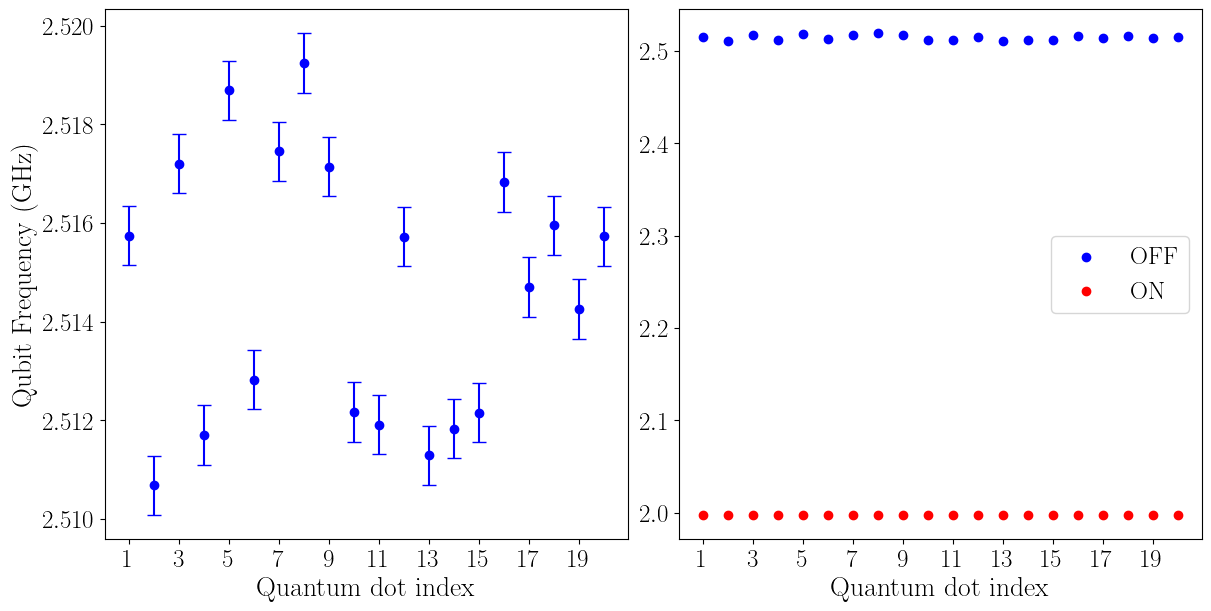

In [274]:
Ns = np.arange(1, 21)  # Number of spins

fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

ax = axs[0]
ax.errorbar(Ns, omegas_z / (2 * np.pi * 1e9), yerr=Delta_omega_z / (2 * np.pi * 1e9), fmt='o', color='blue', capsize=5)
ax.set_xticks(Ns[::2])  # Show every second tick
ax.set_xticklabels(Ns[::2])
ax.set_xlabel('Quantum dot index')
ax.set_ylabel('Qubit Frequency (GHz)')

ax = axs[1]
ax.scatter(Ns, omegas_z / (2 * np.pi * 1e9), marker='o', color='blue', label='OFF')
ax.scatter(Ns, omegas_z / (2 * np.pi * 1e9) - np.array(delta_freqs) * 1e6 / 1e9, marker='o', color='red', label='ON')
ax.set_xticks(Ns[::2])  # Show every second tick
ax.set_xticklabels(Ns[::2])
ax.set_xlabel('Quantum dot index')
ax.legend()
#ax.set_ylabel('Qubit Frequency (GHz)')

In [283]:
#(kB, kB0, kM_z, kE, R)
np.sqrt(float(Rabi_freq_numerical_f(kB_values[0], k_B0[0], 0, 1.29, R_required[0]))) * H_conf.omega_x.subs(H_conf.subs_numerical_values) / (2 * np.pi * 1e6)

52.2788933029673

In [289]:
print('R', np.array(R_required) * lx)
print('Delta frequencies', np.array(delta_freqs))
print('Qubit Frequencies', omegas_z / (2 * np.pi * 1e9) - np.array(delta_freqs) * 1e6 / 1e9)

R [49.25983768 49.09079224 49.30837071 49.12490736 49.35781695 49.16243546
 49.31681376 49.37602102 49.30641227 49.14059402 49.13195584 49.25926349
 49.11104958 49.12930052 49.14003947 49.29600409 49.22520974 49.26690882
 49.21028048 49.25944374]
Delta frequencies [518.2435251  513.18268936 519.70362952 514.20091533 521.1944928
 515.32281791 519.95796263 521.74420346 519.64464853 514.66963715
 514.41148498 518.22626983 513.78711674 514.33215095 514.65306156
 519.33127985 517.20370149 518.45606008 516.7558991  518.23168682]
Qubit Frequencies [1.99749854 1.99749854 1.99749854 1.99749854 1.99749854 1.99749854
 1.99749854 1.99749854 1.99749854 1.99749854 1.99749854 1.99749854
 1.99749854 1.99749854 1.99749854 1.99749854 1.99749854 1.99749854
 1.99749854 1.99749854]


In [284]:
lE = 1.29 * lx 
print(lE)
E = hbar_value**2 / (2 * m_electron * e_constant * (lE * 1e-9)**3)
E

77.4


82.16749769382278